In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
# we will use KNN, mlp classifier, and decision tree 
# as our ensemble members 

label_encoder = LabelEncoder()



from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = label_encoder.fit_transform(dry_bean.data.targets['Class'])





In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Create StandardScaler object
scaler = StandardScaler()

# Fit scaler to training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

ensemble = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('mlp', mlp)], voting='hard')

# Define and train the base classifiers separately
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)



MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [28]:
# Make predictions for each base classifier
knn_pred = knn.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
mlp_pred = mlp.predict(X_test_scaled)

# Print individual confusion matrices for base classifiers
# Evaluate each base classifier individually
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\nMLP Accuracy:", accuracy_score(y_test, mlp_pred))
print("MLP Confusion Matrix:")
print(confusion_matrix(y_test, mlp_pred))


KNN Accuracy: 0.9166360631656262
KNN Confusion Matrix:
[[232   0  21   0   1   3   8]
 [  0 104   0   0   0   0   0]
 [  8   0 308   0   6   2   2]
 [  0   0   0 646   0  10  53]
 [  0   0   6   6 365   0   9]
 [  2   0   1   7   0 383  13]
 [  2   0   0  51  11   5 458]]

Random Forest Accuracy: 0.9206757253029747
Random Forest Confusion Matrix:
[[237   0  16   0   1   3   8]
 [  0 104   0   0   0   0   0]
 [  9   0 307   0   5   2   3]
 [  0   0   0 653   0  12  44]
 [  1   0   5   6 366   0   8]
 [  1   0   0   6   0 389  10]
 [  3   0   0  57   7   9 451]]

MLP Accuracy: 0.9250826294528094
MLP Confusion Matrix:
[[249   0   8   0   0   2   6]
 [  0 103   1   0   0   0   0]
 [ 19   0 297   0   6   2   2]
 [  0   0   0 648   1   8  52]
 [  2   0   2   6 366   0  10]
 [  3   0   0   5   0 390   8]
 [  2   0   0  39  10  10 466]]
Confusion Matrix for KNN:
[[232   0  21   0   1   3   8]
 [  0 104   0   0   0   0   0]
 [  8   0 308   0   6   2   2]
 [  0   0   0 646   0  10  53]
 [  0   0

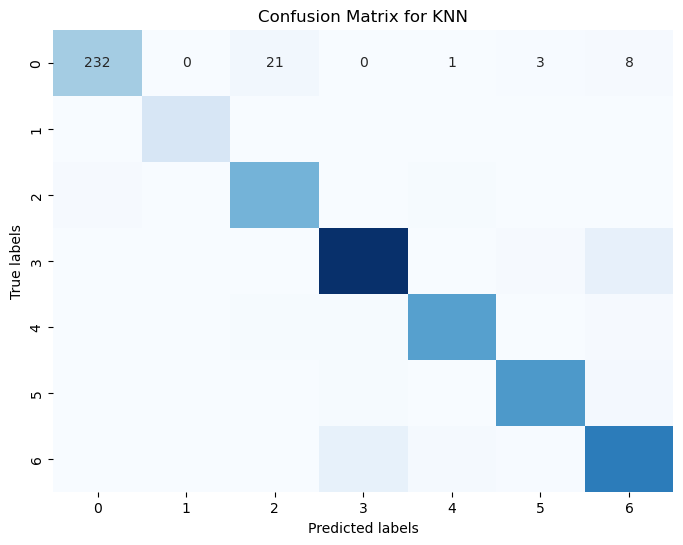

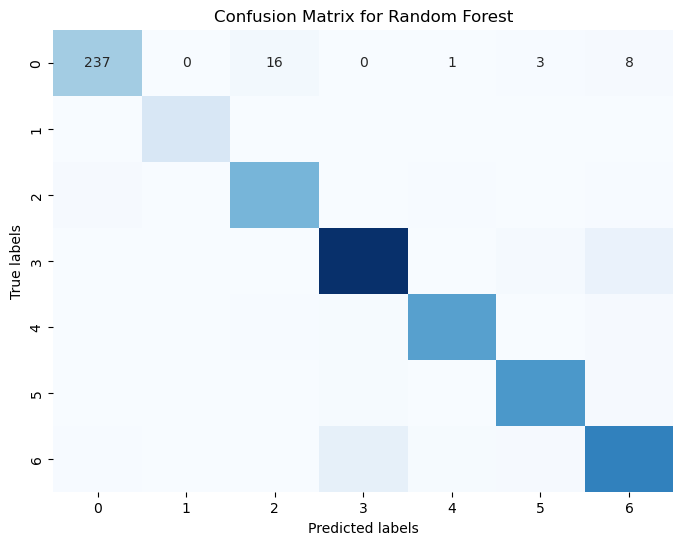

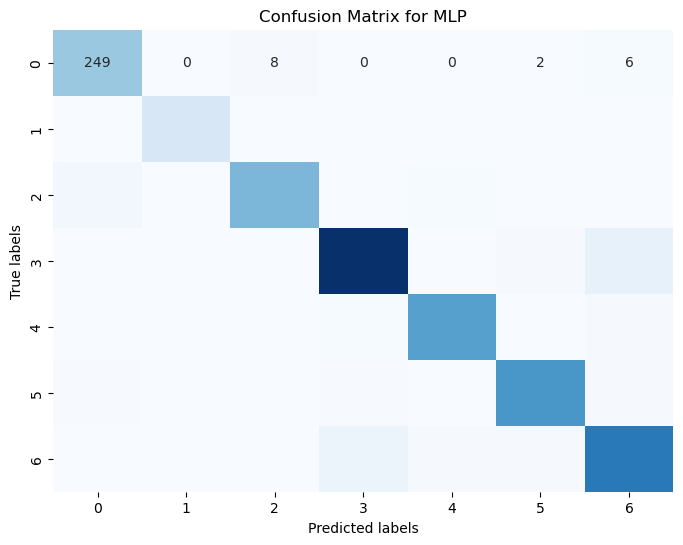

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Plot confusion matrix for MLP
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Again, the diagonals seem decently distinct. 

In [31]:

# Train the ensemble learner
ensemble.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ensemble.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9261843554902681


Ok, let's look at the confusion matrix of the ensemble learner. 

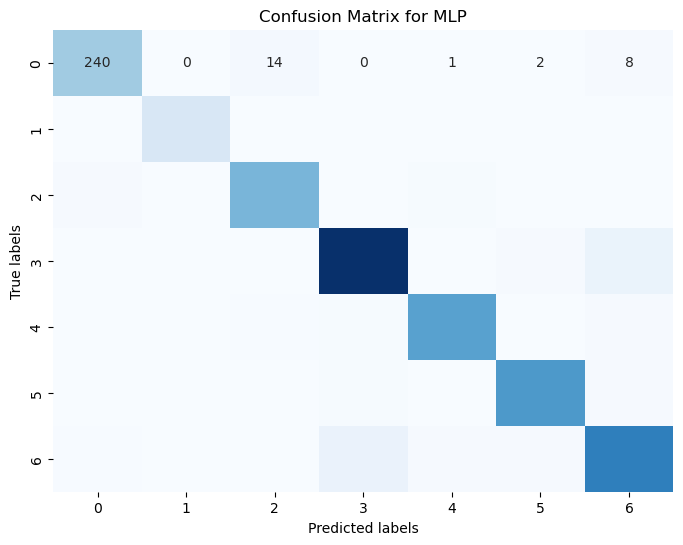

[[240   0  14   0   1   2   8]
 [  0 104   0   0   0   0   0]
 [  9   0 307   0   6   2   2]
 [  0   0   0 657   0   9  43]
 [  1   0   4   6 366   0   9]
 [  1   0   0   6   0 389  10]
 [  3   0   0  46  10   9 459]]


In [34]:
ensemble_conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_conf, annot=True, fmt='d', cmap='Blues', cbar=False) # rendering issues 
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

print(ensemble_conf)

Again, the diagonals are very distinct. Let's finally get the classification metrics. 

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       265
           1       1.00      1.00      1.00       104
           2       0.94      0.94      0.94       326
           3       0.92      0.93      0.92       709
           4       0.96      0.95      0.95       386
           5       0.95      0.96      0.95       406
           6       0.86      0.87      0.87       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



For fun, let's compare to the performance of the MLP model by itself.

In [36]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       265
           1       1.00      0.99      1.00       104
           2       0.96      0.91      0.94       326
           3       0.93      0.91      0.92       709
           4       0.96      0.95      0.95       386
           5       0.95      0.96      0.95       406
           6       0.86      0.88      0.87       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



# Ensemble Method (Random Forest, MLP, and KNN) vs. MLP Classifier

## Ensemble Method Performance

- **Precision**: Precision values for all classes range from 0.86 to 1.00, indicating high accuracy in predicting positive instances. Class 1 achieves near-perfect precision of 1.00.
- **Recall**: Recall values range from 0.87 to 0.99, demonstrating the ability to correctly identify most positive instances. Class 1 achieves a high recall of 0.99.
- **F1-score**: F1-scores range from 0.87 to 1.00, reflecting a balance between precision and recall for each class. Class 1 achieves a near-perfect F1-score of 1.00.
- **Accuracy**: The overall accuracy of the ensemble method is 93%, indicating a high level of correctness in classifying instances across all classes.
- **Macro and Weighted Average**: Both macro and weighted average scores are high, indicating consistent performance across all classes.

## Comparison with Individual MLP Classifier

- The ensemble method achieves a similar overall accuracy of 93% compared to the MLP classifier, indicating comparable performance in correctly classifying instances.
- High precision, recall, and F1-score values are observed for each class in the ensemble method, with minor variations compared to the MLP classifier.
- Class 1 achieves near-perfect precision, recall, and F1-score in both the ensemble method and the MLP classifier.
- The ensemble method demonstrates consistent and high performance across all classes, suggesting effectiveness in accurately classifying instances into their respective classes, leveraging the strengths of Random Forest, MLP, and KNN classifiers.
